In [1]:
%pylab notebook
import matplotlib.pyplot as plt
from charistools.timeSeries import TimeSeries
import pandas as pd

/Users/brodzik/miniconda3/envs/charis/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
drainageids = ['AM_Vakhsh_at_Komsomolabad',
               'IN_Hunza_at_DainyorBridge',
               'GA_Karnali_at_Benighat',
               'GA_Narayani_at_Devghat',
               'GA_SaptaKosi_at_Chatara']

<IPython.core.display.Javascript object>


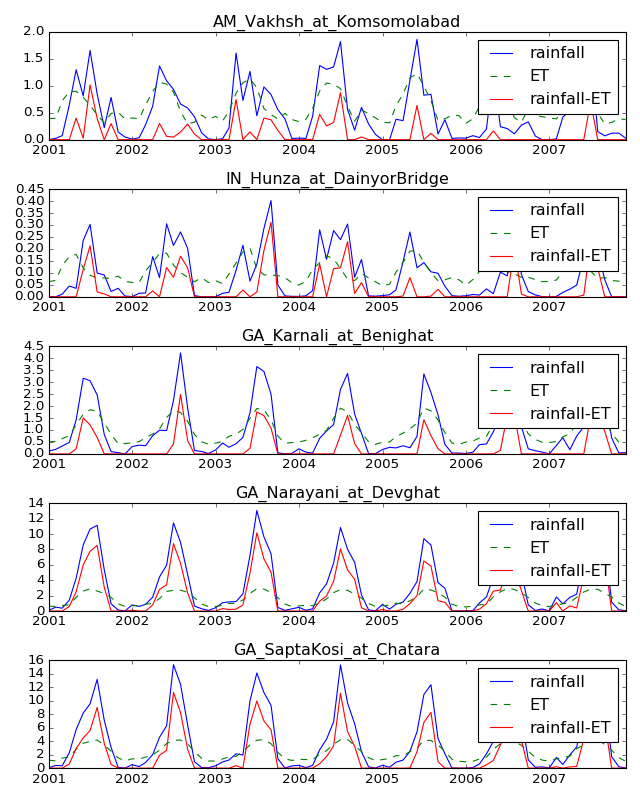

In [3]:
fig, ax = plt.subplots(len(drainageids),1, figsize=(8,10))

In [4]:
for i, id in enumerate(drainageids):
    rainfallFile = '/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage/' + id + \
        '.APHRODITE_rainfall_km3.monthly.v01.csv'
    ETFile = '/Users/brodzik/projects/CHARIS/evapotranspiration/mod16/' + id + '.mod16.ET.csv'
    rainfall = TimeSeries(rainfallFile)
    et = TimeSeries(ETFile)
    rainfall.data['et_km3'] = et.data["et"]
    rainfall.data['diff_km3'] = rainfall.data["rainfall"] - rainfall.data["et_km3"]
    rainfall.data['rainfall-et_km3'] = rainfall.data['diff_km3']
    rainfall.data['rainfall-et_km3'][rainfall.data['rainfall-et_km3'] < 0.] = 0.
    print(rainfall.data)
    ax[i].plot(rainfall.data['rainfall'], color='b', label='rainfall')
    ax[i].plot(rainfall.data['et_km3'], '--', color='g', label='ET')
    ax[i].plot(rainfall.data['rainfall-et_km3'], color='r', label='rainfall-ET')
    ax[i].set_title(id)
    ax[i].legend()
    newFile = '/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage_less_et/' \
        + id + '.APHRODITE_rainfall_adj_mod16_ET_km3.monthly.v01.csv'
    rainfall.write(newFile)
plt.tight_layout()        

/Users/brodzik/miniconda3/envs/charis/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


            doy  rainfall    et_km3  diff_km3  rainfall-et_km3
datetime                                                      
2001-01-01    1  0.000000  0.391944 -0.391944         0.000000
2001-02-01   32  0.025315  0.396155 -0.370839         0.000000
2001-03-01   60  0.074192  0.721916 -0.647724         0.000000
2001-04-01   91  0.642380  0.888541 -0.246160         0.000000
2001-05-01  121  1.298783  0.898276  0.400507         0.400507
2001-06-01  152  0.812517  0.784461  0.028056         0.028056
2001-07-01  182  1.657299  0.640211  1.017088         1.017088
2001-08-01  213  0.849825  0.458508  0.391317         0.391317
2001-09-01  244  0.223928  0.313089 -0.089161         0.000000
2001-10-01  274  0.783673  0.486218  0.297455         0.297455
2001-11-01  305  0.139334  0.508952 -0.369618         0.000000
2001-12-01  335  0.049581  0.382669 -0.333088         0.000000
2002-01-01    1  0.008315  0.403864 -0.395548         0.000000
2002-02-01   32  0.037093  0.387152 -0.350059         0

In [5]:
plt.savefig('calibration_basins.rainfall-ET.v01.png')

In [6]:
%pwd

u'/Users/brodzik/ipython_notebooks/charis'